In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('toofailid/kaebused_töödeldud.csv')

In [45]:
data

,#,Kaebuse kuupäev,Kaebuse aasta,Väljaanne,Kaebuse sisu,Lahendi tulemus1,Lahendi tulemus2,Lahendi kuupäev,Otsuse sisu,Otsuse liik,...,4.8,4.9,4.10,4.11,4.12,5.1,5.2,5.3,6.1,Koodeksipunkte
0,1081,27.12.21,2021,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
1,1080,08.12.21,2021,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
2,1079,08.12.21,2021,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.",tauniv,...,0,0,0,0,0,1,0,0,0,2
3,1078,06.12.21,2021,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
4,1077,02.12.21,2021,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",pressinõukogu otsus,pressinõukogu otsus,27.01.2022,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,5,12.11.02,2002,"KesKus, Koit ""Kaos arhitektuuri- pärandis"", ""Soss-seplus Eesti ilusaima mõisahoonega""","Kaebaja väitel on artiklites Ahja mõisa puudutavas osas faktivead ja põhjendamatu laim. Maakonnalehes ""Koit"" avaldamine tekitas kaebaja väitel Ahja valla elanikes põhjendamatuid kannatusi ja solvas pa

In [12]:
#crosstb = pd.crosstab(index=data["Väljaande nimi"], 
#                            columns=data["Otsuse liik"])

In [43]:
#crosstb

In [44]:
#fig, ax = plt.subplots(figsize=(20,20))
#plt.title("Pressinõukogus trükimeedia kohta tehtud otsuste jaotus väljaannete lõikes 2002-2021", size=18)
#crosstb.sort_values(by='õigeksmõistev', ascending=True).plot(ax=ax, kind='barh', fontsize=14).legend(loc='center right', fontsize = 16)
#plt.savefig("02joonised/joonis2_3_Pressinõukogus_tehtud_otsuste_jaotus_väljaannete_lõikes.png")
#plt.show()

## Rikutud eetikakoodeksi punktid taunivates otsustes

### Vaatluse all kuus suuremat väljaannet

In [46]:
pm = data[(data['Väljaande nimi']== 'Postimees') & (data['Otsuse liik']=='tauniv')]
ee = data[(data['Väljaande nimi']== 'Eesti Ekspress') & (data['Otsuse liik']=='tauniv')]
epl = data[(data['Väljaande nimi']== 'Eesti Päevaleht') & (data['Otsuse liik']=='tauniv')]
dlf = data[(data['Väljaande nimi']== 'Delfi') & (data['Otsuse liik']=='tauniv')]
õl = data[(data['Väljaande nimi']== 'Õhtuleht') & (data['Otsuse liik']=='tauniv')]
äp = data[(data['Väljaande nimi']== 'Äripäev') & (data['Otsuse liik']=='tauniv')]

In [47]:
# Eetikakoodeksis olevad punktid
koodeksipunktid = ['1.1', '1.2', '1.3', '1.4', '1.5', '1.6', 
                   '2.1', '2.2', '2.3', '2.4', 
                   '3.1','3.2', '3.3', '3.4', '3.5', '3.6','3.7',
                   '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '4.10', '4.11', '4.12',
                   '5.1', '5.2', '5.3',
                   '6.1', '6.2', '6.3', '6.4']

In [48]:
# väljastab tabeli väljaandes tehtud eksimuste kohta eetikakoodeksi punktide lõikes (sagedus ja osakaal)
# salvestab faili
def Eksitaja(andm):
    andm_koodeks = []
    andm_eksimusi = []
    for i in koodeksipunktid:
        if i in andm.columns:
            s = andm[i].sum()
            if s != 0:
                andm_koodeks.append(i)
                andm_eksimusi.append(s)
    summa = sum(andm_eksimusi)
    andm_e = pd.DataFrame({'Koodeksipunkt':andm_koodeks, 'Eksimuste arv': andm_eksimusi})
    andm_e['Osakaal'] = round((andm_e['Eksimuste arv'] / summa )* 100, 1)
    andm_e.index.name = andm['Väljaande nimi'].iloc[0]
    andm_e.to_excel("02tabelid/tabel2_" + andm['Väljaande nimi'].iloc[0]+ "_taunivates_otsustes_rikutud_eetikakoodeksit_.xlsx") 
    return andm_e

In [49]:
# väljastab joonise väljaandes tehtud eksimuste kohta eetikakoodeksi punktide lõikes (osakaal)
# salvestab faili
def Eksitaja_joonis(andm):
    fig, ax = plt.subplots(figsize=(10,7))
    plt.title(andm['Väljaande nimi'].iloc[0]+  ": taunivates otsustes rikutud eetikakoodeksi punkte", size=18)
    Eksitaja(andm).plot(ax=ax, kind='bar', fontsize=14, x = 'Koodeksipunkt', y = 'Osakaal')
    plt.savefig("02joonised/joonis2_" + andm['Väljaande nimi'].iloc[0]+ "_taunivates_otsustes_rikutud_eetikakoodeksit.png")
    plt.show()

In [50]:
Eksitaja(pm)

,Koodeksipunkt,Eksimuste arv,Osakaal
Postimees,,,
0,1.4,14,15.9
1,1.5,2,2.3
2,3.5,4,4.5
3,4.1,16,18.2
4,4.2,20,22.7
5,4.3,2,2.3
6,4.4,3,3.4
7,4.8,1,1.1
8,4.9,1,1.1


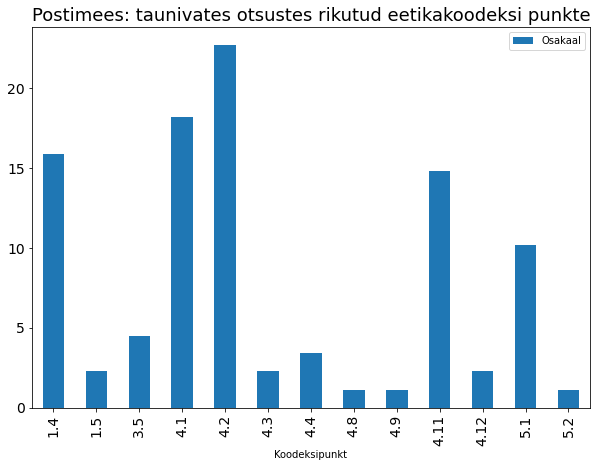

In [51]:
Eksitaja_joonis(pm)

In [52]:
Eksitaja(ee)

,Koodeksipunkt,Eksimuste arv,Osakaal
Eesti Ekspress,,,
0,1.4,6,12.0
1,1.5,1,2.0
2,3.1,1,2.0
3,3.3,1,2.0
4,3.5,1,2.0
5,4.1,5,10.0
6,4.2,15,30.0
7,4.4,2,4.0
8,4.10,1,2.0


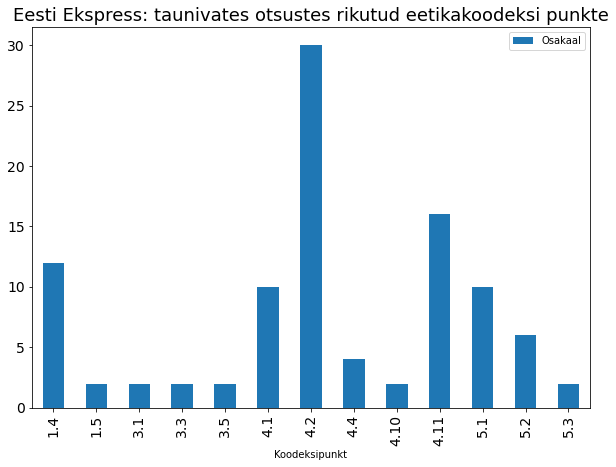

In [53]:
Eksitaja_joonis(ee)

In [54]:
Eksitaja(epl)

,Koodeksipunkt,Eksimuste arv,Osakaal
Eesti Päevaleht,,,
0,1.4,16,29.1
1,1.5,2,3.6
2,3.5,2,3.6
3,4.1,8,14.5
4,4.2,11,20.0
5,4.11,3,5.5
6,4.12,3,5.5
7,5.1,8,14.5
8,5.2,1,1.8


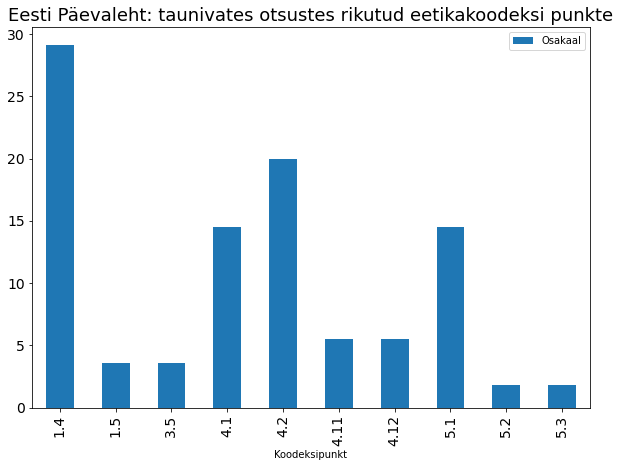

In [55]:
Eksitaja_joonis(epl)

In [56]:
Eksitaja(dlf)

,Koodeksipunkt,Eksimuste arv,Osakaal
Delfi,,,
0,1.4,11,17.7
1,1.5,3,4.8
2,3.3,1,1.6
3,3.5,4,6.5
4,3.7,1,1.6
5,4.1,6,9.7
6,4.2,16,25.8
7,4.3,1,1.6
8,4.6,1,1.6


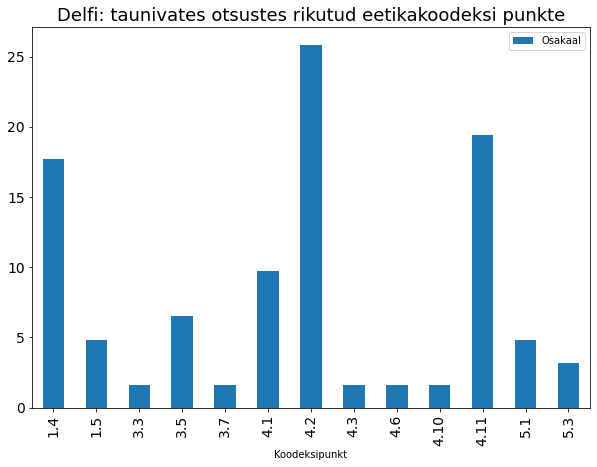

In [57]:
Eksitaja_joonis(dlf)

In [58]:
Eksitaja(õl)

,Koodeksipunkt,Eksimuste arv,Osakaal
Õhtuleht,,,
0,1.4,7,21.2
1,3.3,1,3.0
2,3.5,3,9.1
3,4.1,3,9.1
4,4.2,6,18.2
5,4.4,1,3.0
6,4.11,7,21.2
7,5.1,3,9.1
8,5.2,1,3.0


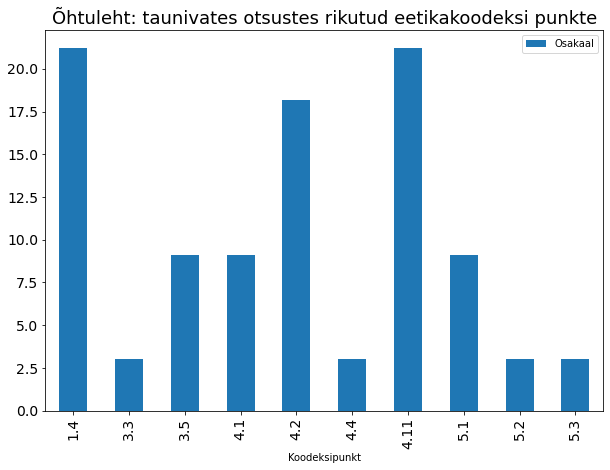

In [59]:
Eksitaja_joonis(õl)

In [60]:
Eksitaja(äp)

,Koodeksipunkt,Eksimuste arv,Osakaal
Äripäev,,,
0,1.4,8,36.4
1,1.5,1,4.5
2,4.1,1,4.5
3,4.2,2,9.1
4,4.4,1,4.5
5,4.10,1,4.5
6,4.11,3,13.6
7,5.1,3,13.6
8,5.2,2,9.1


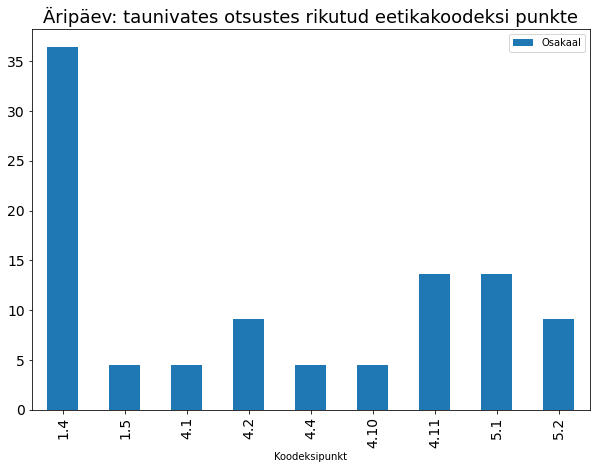

In [61]:
Eksitaja_joonis(äp)